In [33]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"whoscryinginyourroom","key":"36bbbc8019bc72532360dcad224b92f3"}'}

In [35]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [36]:
!kaggle datasets download -d whoscryinginyourroom/vehicle-datasets

vehicle-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip vehicle-datasets.zip

Archive:  vehicle-datasets.zip
replace dataset/test/mobil/1002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/test/mobil/1002.jpg  
  inflating: dataset/test/mobil/1006.jpg  
  inflating: dataset/test/mobil/1012.jpg  
  inflating: dataset/test/mobil/1030.jpg  
  inflating: dataset/test/mobil/1032.jpg  
  inflating: dataset/test/mobil/1037.jpg  
  inflating: dataset/test/mobil/104.jpg  
  inflating: dataset/test/mobil/1053.jpg  
  inflating: dataset/test/mobil/1055.jpg  
  inflating: dataset/test/mobil/1057.jpg  
  inflating: dataset/test/mobil/1066.jpg  
  inflating: dataset/test/mobil/1075.jpg  
  inflating: dataset/test/mobil/1077.jpg  
  inflating: dataset/test/mobil/1082.jpg  
  inflating: dataset/test/mobil/1092.jpg  
  inflating: dataset/test/mobil/1093.jpg  
  inflating: dataset/test/mobil/1100.jpg  
  inflating: dataset/test/mobil/1105.jpg  
  inflating: dataset/test/mobil/1106.jpg  
  inflating: dataset/test/mobil/1110.jpg  
  inflating: dataset/test/mobil/1

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# define the model architecture
model = Sequential()

In [40]:
# Blok Konvolusi 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [41]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [43]:
# Membuat objek ImageDataGenerator untuk melakukan augmentasi gambar pada data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [44]:
# Membuat objek ImageDataGenerator untuk rescaling gambar pada data testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['mobil', 'motor'])

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['mobil', 'motor'])

Found 2175 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [46]:
# Melatih model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    verbose=1,
    validation_data=test_generator,
    shuffle=True,
    validation_steps=len(test_generator))

Epoch 1/15
68/68 [==============================] - 47s 612ms/step - loss: 0.7726 - accuracy: 0.6414 - val_loss: 0.5969 - val_accuracy: 0.7917
Epoch 2/15
68/68 [==============================] - 43s 627ms/step - loss: 0.6493 - accuracy: 0.6524 - val_loss: 0.5361 - val_accuracy: 0.7917
Epoch 3/15
68/68 [==============================] - 41s 607ms/step - loss: 0.6471 - accuracy: 0.6524 - val_loss: 0.5403 - val_accuracy: 0.7917
Epoch 4/15
68/68 [==============================] - 41s 605ms/step - loss: 0.6467 - accuracy: 0.6524 - val_loss: 0.5761 - val_accuracy: 0.7917
Epoch 5/15
68/68 [==============================] - 42s 620ms/step - loss: 0.6466 - accuracy: 0.6524 - val_loss: 0.5682 - val_accuracy: 0.7917
Epoch 6/15
68/68 [==============================] - 41s 602ms/step - loss: 0.6474 - accuracy: 0.6524 - val_loss: 0.5628 - val_accuracy: 0.7917
Epoch 7/15
68/68 [==============================] - 41s 600ms/step - loss: 0.6466 - accuracy: 0.6524 - val_loss: 0.5744 - val_accuracy: 0.7917

Saving toyota-yaris-cross-3_169.jpeg to toyota-yaris-cross-3_169 (1).jpeg
1/1 [==============================] - 0s 38ms/step


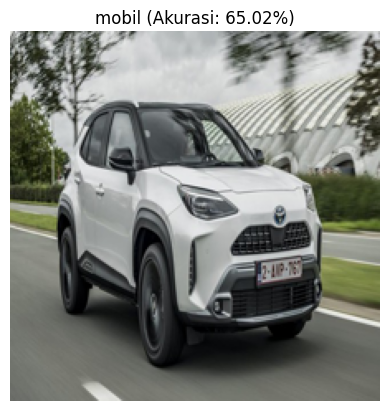

In [48]:
# Mengunggah gambar
uploaded_file = files.upload()

# Memprediksi kelas gambar
for file_name in uploaded_file.keys():
    img_path = file_name
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    # Menampilkan gambar dan label prediksi
    if prediction[0][0] > prediction[0][1]:
        label = 'mobil'
        accuracy = prediction[0][0] * 100
    else:
        label = 'motor'
        accuracy = prediction[0][1] * 100

    plt.imshow(img_array[0,:,:,:])
    plt.title(label + " (Akurasi: {:.2f}%)".format(accuracy))
    plt.axis('off')
    plt.show()